In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

sentences = []
with open('words.txt','r') as f:
    while True:
        line = f.readline().strip().replace('\'','').replace('\"','') 
        if line == '':
            break
        if line[0]!='#':
            sentences.append(line.split(' '))


In [3]:
import csv
df = pd.DataFrame(sentences)
df = pd.DataFrame(df.iloc[:,[0,8]])
df.columns = ['id','text']
df.head()

,id,text
0,a01-000u-00-00,A
1,a01-000u-00-01,MOVE
2,a01-000u-00-02,to
3,a01-000u-00-03,stop
4,a01-000u-00-04,Mr.


(51, 27)


0    A
Name: text, dtype: object

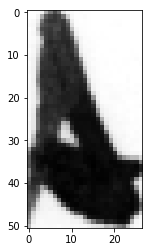

In [5]:
import cv2

img_path = 'words/a01/a01-000u/*'

img = cv2.imread(glob.glob(img_path)[0], cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.imshow(img, cmap='Greys_r')
df['text'].head(1)

In [7]:
import os
directory = 'words'

X_data,X_labels = [],[]
for c,img in enumerate(os.walk(directory)):
    if c<2:
        continue
    for each in img[2]:
        path = img[0]+'/'+each
        X_labels.append(path.split('/')[-1][:-4])
        i = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        try:
            shape = (150,60)
            X_data.append(cv2.resize(i,(shape)))
        except Exception as e:
            print(e)
            X_data.append(np.zeros(shape))


OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [14]:
len(X_data)

115321

a01-000u-00-05 5    Gaitskell
Name: text, dtype: object Gaitskell


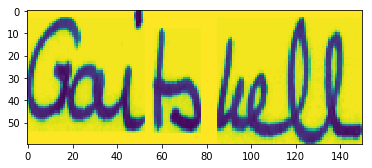

In [31]:
# checking purposes
i = 5
plt.imshow(X_data[i].reshape(X_data[i].shape[:2]))
print(X_labels[i],df[df['id']==X_labels[i]]['text'],df['text'][i])

In [9]:
import re
def clean(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split()).lower()

In [10]:
vocab = np.array(df['text'])
vocab = [str(each) for each in vocab] 
clean_text = clean(' '.join(str(v) for v in vocab))

print(clean_text[:100]) # one continuous string of all words

a move to stop mr gaitskell from nominating any more labour life peers is to be made at a meeting of
11628


In [52]:
unique_words = list(set(clean_text.split(' ')))
print(len(unique_words))

11628


In [59]:
print(unique_words[:10])
print(vocab[:10])

['dropped', 'debates', 'pestle', 'eccentric', 'collating', 'tower', 'massive', 'arguably', 'assumption', 'thomass']
['A', 'MOVE', 'to', 'stop', 'Mr.', 'Gaitskell', 'from', 'nominating', 'any', 'more']


In [12]:
# from keras.preprocessing.text import Tokenizer
# tokenizer = Tokenizer(num_words=11630) # max num of words
# tokenizer.fit_on_texts(clean_text)

# df['text_to_int'] = [tokenizer.texts_to_sequences(each) for each in df['text']]
# df.head()

,id,text,text_to_int
0,a01-000u-00-00,A,[[3]]
1,a01-000u-00-01,MOVE,"[[14], [4], [21], [1]]"
2,a01-000u-00-02,to,"[[2], [4]]"
3,a01-000u-00-03,stop,"[[7], [2], [4], [18]]"
4,a01-000u-00-04,Mr.,"[[14], [8], []]"


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
unique_words.append('')
encoder.fit(vocab)

LabelEncoder()

In [65]:
y_data_encoded = []
words_to_add = []

for each in df['text']:
    try:
        y_data_encoded.append(encoder.transform([each]))
    except Exception as e:
        print(e)
        words_to_add.append(each)
        y_data_encoded.append(0)
print(y_data_encoded[:10])

[array([359]), array([2112]), array([12516]), array([11914]), array([2303]), array([1460]), array([7158]), array([9295]), array([3917]), array([9074])]


In [73]:
y_data_encoded = [each[0] for each in y_data_encoded]
df['text_to_int_2'] = y_data_encoded
df.head()

,id,text,text_to_int,text_to_int_2
0,a01-000u-00-00,A,[3],359
1,a01-000u-00-01,MOVE,"[14, 4, 21, 1]",2112
2,a01-000u-00-02,to,"[2, 4]",12516
3,a01-000u-00-03,stop,"[7, 2, 4, 18]",11914
4,a01-000u-00-04,Mr.,"[14, 8, 0]",2303


In [13]:
# y_data = []
# for each in np.array(df['text_to_int']):
#     t=[]
#     for i in each:
#         try:
#             x = int(i[0])
#         except:
#             x = 0
#         t.append(x)    
#     y_data.append(t)
# df['text_to_int'] = y_data
# df.head()

,id,text,text_to_int
0,a01-000u-00-00,A,[3]
1,a01-000u-00-01,MOVE,"[14, 4, 21, 1]"
2,a01-000u-00-02,to,"[2, 4]"
3,a01-000u-00-03,stop,"[7, 2, 4, 18]"
4,a01-000u-00-04,Mr.,"[14, 8, 0]"


In [74]:
X_data = np.array([np.reshape(each,(150,60,1)) for each in X_data])
print(len(df),len(X_labels),len(X_data))

KeyboardInterrupt: 

In [75]:
X_train = X_data[:80700]
X_test = X_data[80700:][:-1]
y_train = np.array(y_data_encoded[:80700])
y_test = np.array(y_data_encoded[80700:]) #31500
print(len(X_train),len(X_test),len(y_train),len(y_test))

80700 34620 80700 34620


In [76]:
print(type(X_train),type(X_test),type(y_train),type(y_test))
print(len(X_train),len(X_test),len(y_train),len(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
80700 34620 80700 34620


In [77]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Lambda, Dropout, LSTM
from keras.optimizers import Adam

In [84]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),strides=(2,2),activation='relu',input_shape=(150,60,1))) # input shape is variable...
model.add(MaxPooling2D())
model.add(Conv2D(64,kernel_size=(5,5),strides=(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(26,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13487,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 73, 28, 32)        832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 5, 64)         51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 2, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 26)                26650     
__________

In [80]:
max(y_data_encoded)

13486

In [85]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test,y_test), batch_size=32)

Train on 80700 samples, validate on 34620 samples
Epoch 1/3
80672/80700 [============================>.] - ETA: 0s - loss: 7.6037 - acc: 0.0528

KeyboardInterrupt: 

In [ ]:
model.save('handwritten_text.h5')

In [ ]:
from keras.models import load_model

hw_model = load_model('handwritten_text.h5')